## About the dataset

The Global EV Outlook is an annual publication that identifies and discusses recent developments in electric mobility across the globe. It is developed with the support of the members of the Electric Vehicles Initiative (EVI). Combining historical analysis with projections to 2030, the report examines key areas of interest such as electric vehicle and charging infrastructure deployment, energy use, CO2 emissions, battery demand and related policy developments. The report includes policy recommendations that incorporate lessons learned from leading markets to inform policy makers and stakeholders with regard to policy frameworks and market systems for electric vehicle adoption.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("Electric Vehicle Sales Data.csv")
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
1,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170
2,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80
3,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100
4,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190


In [3]:
df.shape

(834, 8)

**Interpretation:** The data has 834 observations and 8 variables.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   region      834 non-null    object
 1   category    834 non-null    object
 2   parameter   834 non-null    object
 3   mode        834 non-null    object
 4   powertrain  834 non-null    object
 5   year        834 non-null    int64 
 6   unit        834 non-null    object
 7   value       834 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 52.2+ KB


In [5]:
df.nunique()

region         36
category        1
parameter       1
mode            1
powertrain      2
year           13
unit            1
value         328
dtype: int64

**Interpretation:** There is no garbage and gaps in the dataset, which is good. We are interested in 4 features: region, powertrain, year, value.

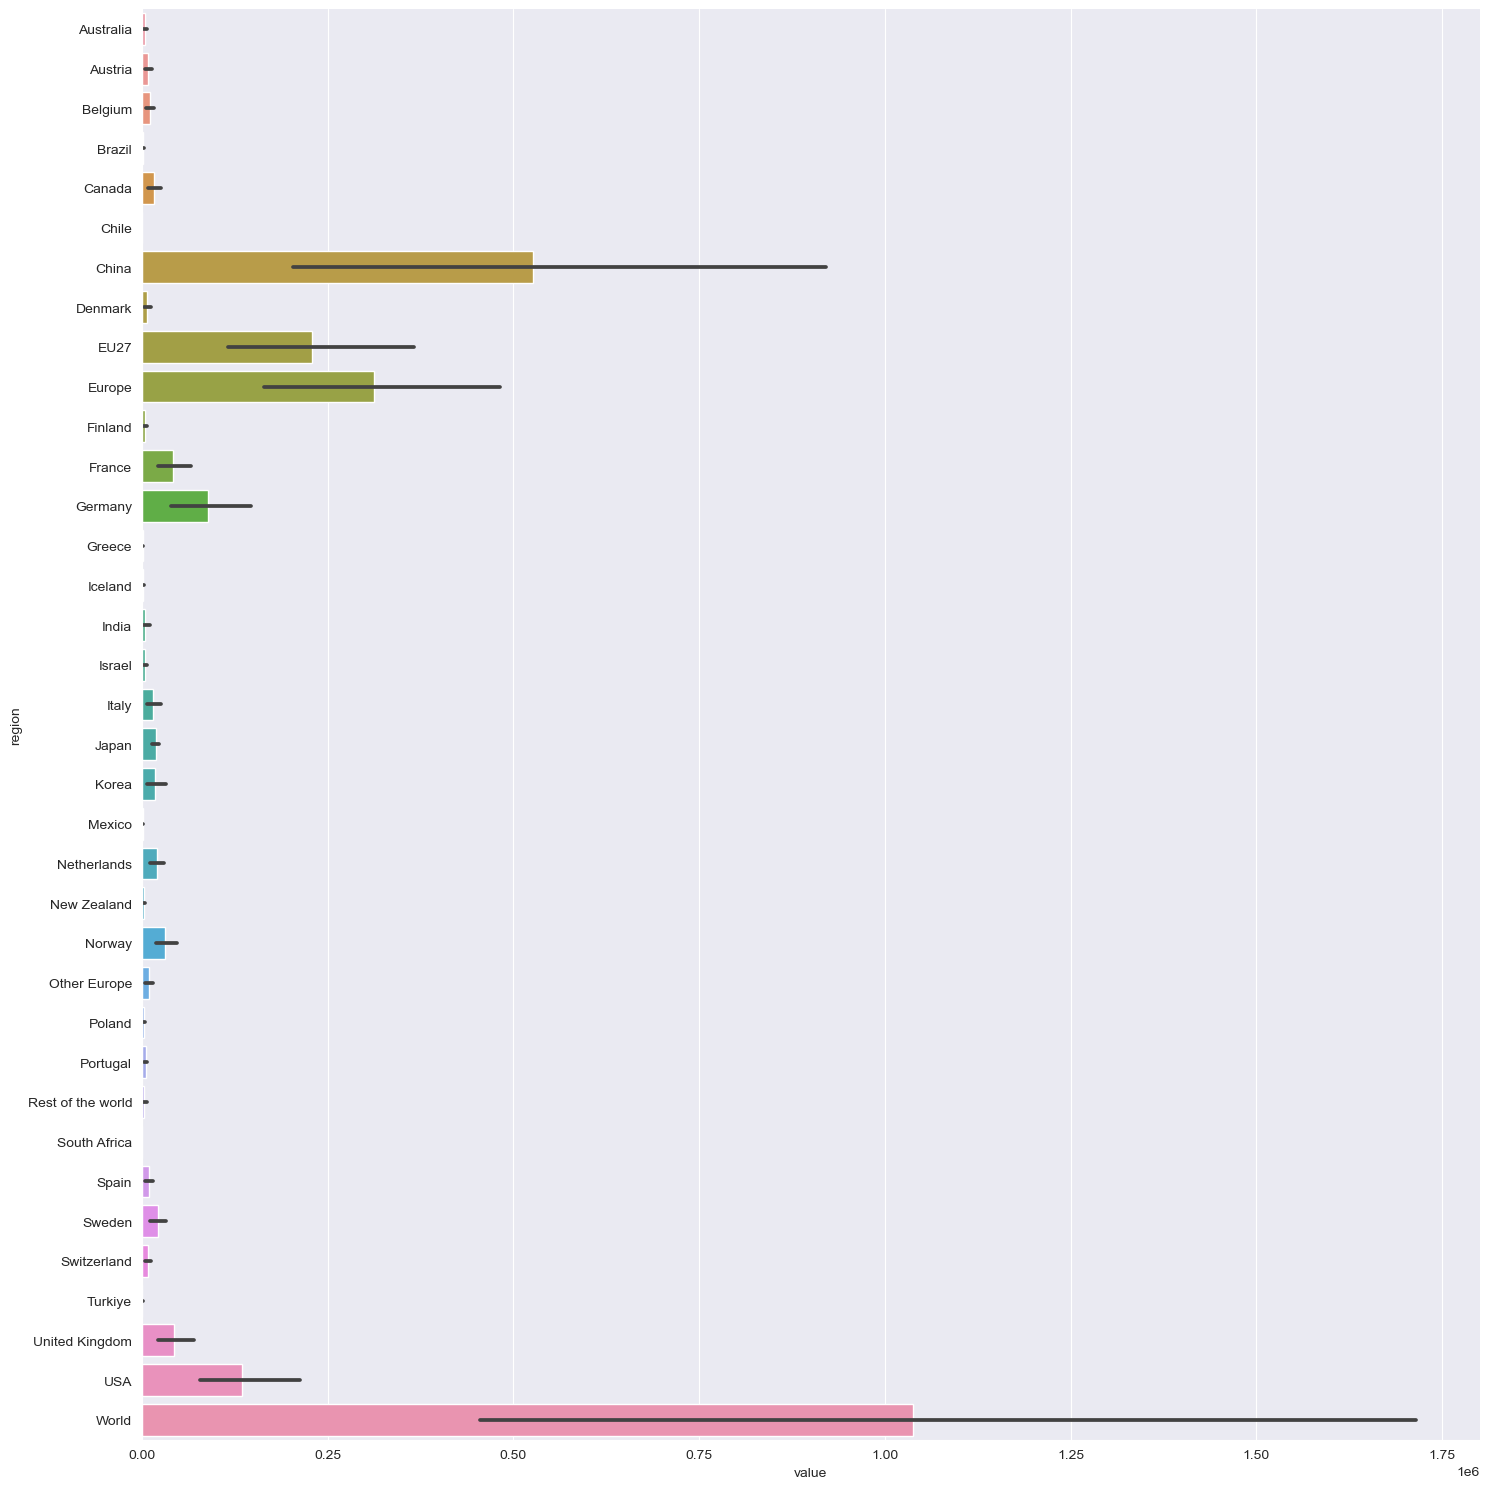

In [6]:
sns.catplot(data=df, x='value', y='region', kind='bar', height=15)

**Interpretation:** World results spoil the picture, exclude them.

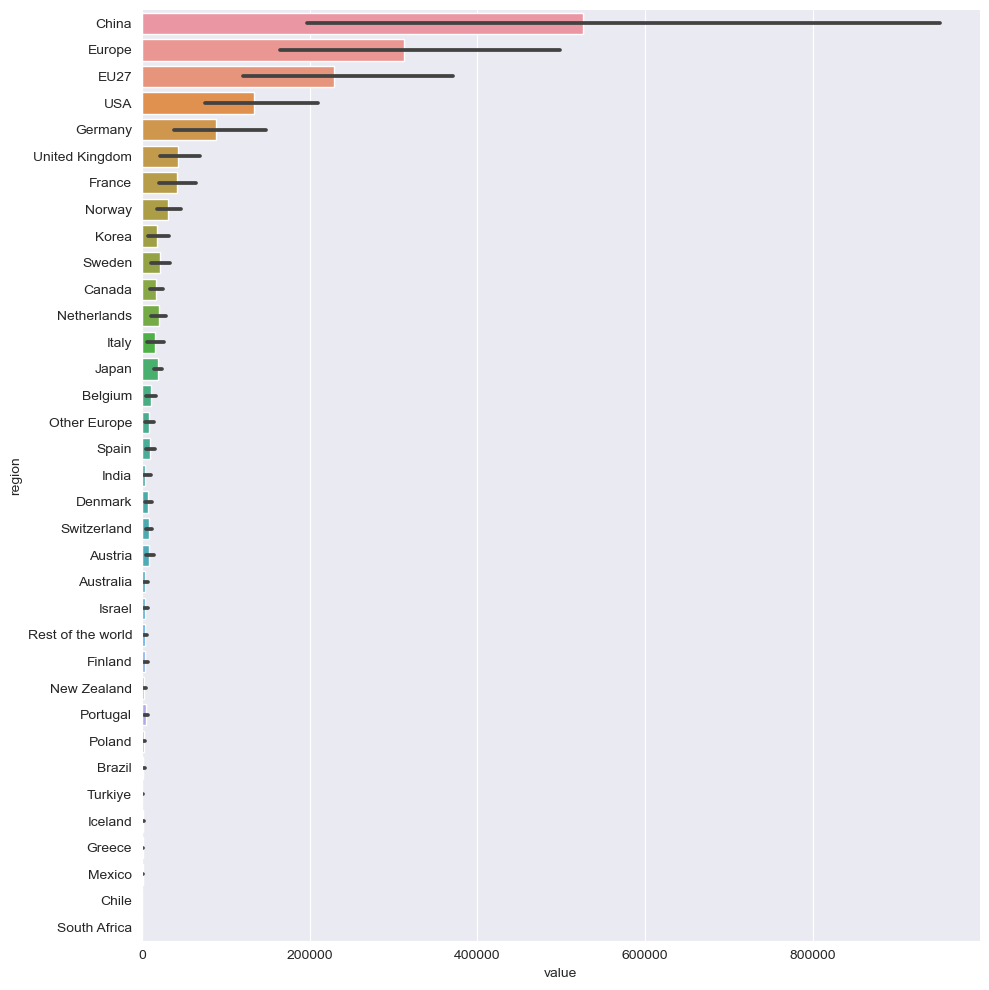

In [7]:
without_world = df[df['region'] != 'World'].sort_values(by=['value'], ascending=False)
sns.catplot(data=without_world, x='value', y='region', kind='bar', height=10)

**Interpretation:** Great! After sorting, we see that the leaders in electric car purchases are China, Europe, EU27, USA and Germany.

Let's find out if the demand for electric cars is increasing in the world.

<Axes: xlabel='year', ylabel='value'>

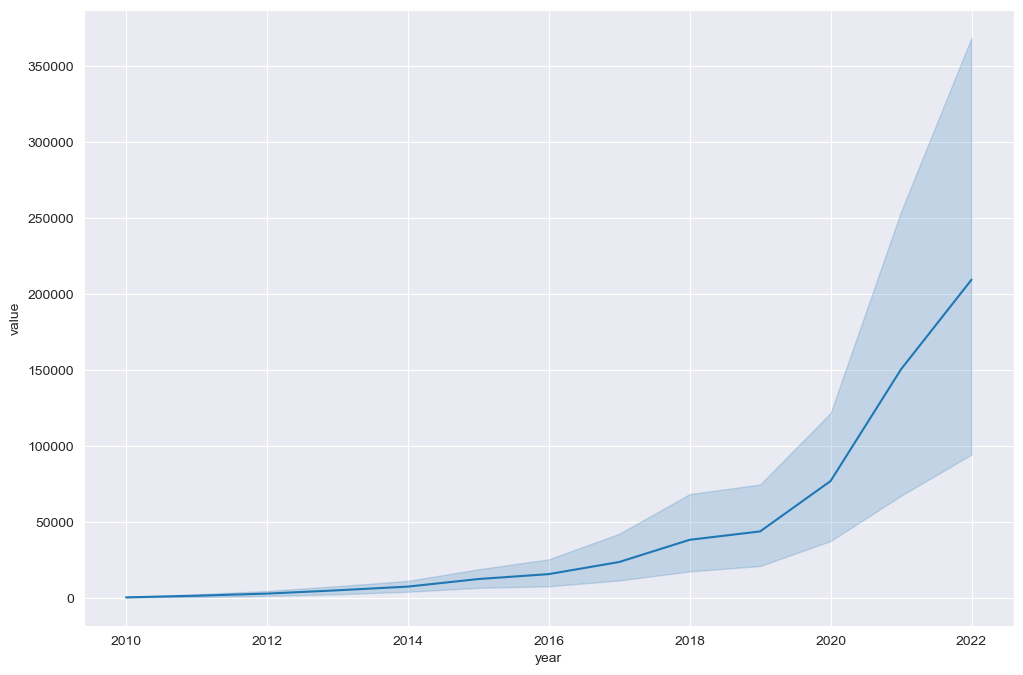

In [8]:
plt.figure(figsize = (12, 8))
sns.lineplot(data = without_world, x = 'year', y = 'value')

**Interpretation:** Oh yes, the demand for electric cars has a huge growth every year.

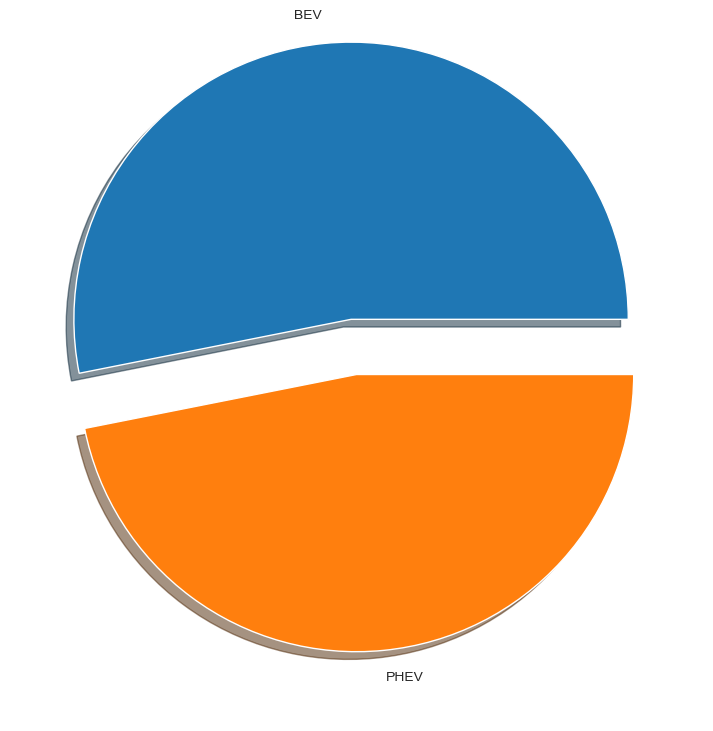

In [9]:
powertrain = df['powertrain'].value_counts()
plt.figure(figsize = (10,9))
plt.pie(data = powertrain, x = powertrain.values, labels = powertrain.index, shadow = True, explode = (0.2, 0))
plt.show()

**Interpretation:** Let's take a look at powertrain. As we can see we have an almost equal distribution. But has it always been like this?

<Axes: xlabel='year', ylabel='value'>

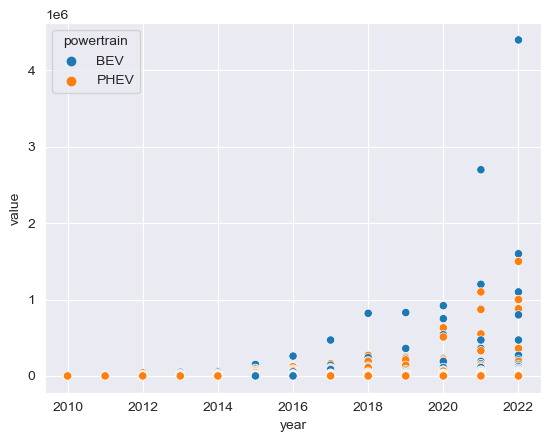

In [10]:
sns.scatterplot(x = without_world['year'], y = without_world['value'], hue = without_world['powertrain'])

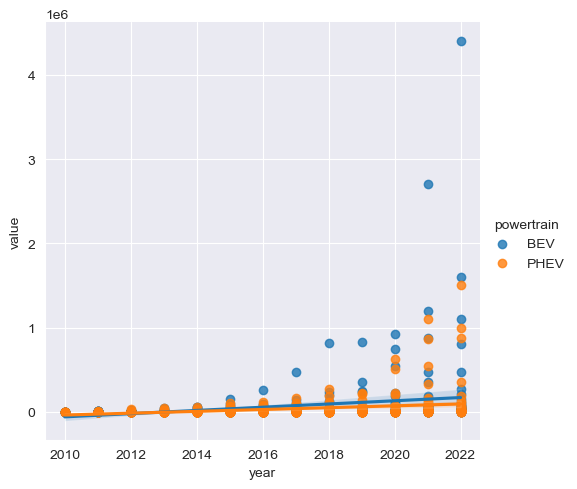

In [11]:
sns.lmplot(x = "year", y = "value", hue = "powertrain", data = without_world)

**Interpretation:** BEV powertrain is becoming more and more popular every year.